##Vanilla CCN model in Google Colab using TensorFlow framework

In [3]:
# Import basic libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [4]:
# unzip the zipped folder "dataset.zip"
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: output/Triangle_4ff40a0e-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Pentagon_525f083e-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Star_5deee138-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Heptagon_6bbd88d2-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Triangle_6c37d862-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Star_75ccb3b6-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Circle_7d6d2772-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Circle_84c8b694-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Hexagon_863b8844-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Circle_887b748e-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Triangle_8c1b82d2-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Star_902d1782-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Triangle_9a31c6d8-2a83-11ea-8123-8363a7ec19e6.png  
  inflating: output/Heptagon_9a5

# Exploratory Data Analysis

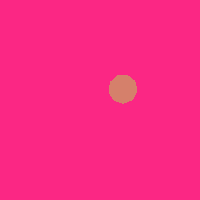

In [7]:
# Visualiaze one image
from PIL import Image
Image.open('output/Nonagon_bd741c92-2a9a-11ea-8123-8363a7ec19e6.png')

In [8]:
# Check properties about the image
image_sample = Image.open('output/Nonagon_bd741c92-2a9a-11ea-8123-8363a7ec19e6.png')
print(image_sample.format)
print(image_sample.size)
print(image_sample.mode)

PNG
(200, 200)
RGB


In [5]:
# Count the number of images in the folder
import os
path = 'output'
files = os.listdir(path)
print(len(files))

90000


In [6]:
# Get the labels from the images
labels = []
for i in range(len(files)):
    for idx, char in enumerate(files[i]):
        if char == '_':
            labels.append(files[i][0:idx])
            break

In [10]:
# check lables has the same length as files
len(labels) == len(files)

True

# Load the data

In [7]:
# Because all files are in the same folder we will use 
# flow_from_dataframe Method from Keras

# Generate the dataframe

import pandas as pd

dict_data = {'Files': files, 'Labels': labels}
df = pd.DataFrame(dict_data)
df.head(5)

,Files,Labels
0,Triangle_9f50723e-2a8a-11ea-8123-8363a7ec19e6.png,Triangle
1,Square_7352f43c-2a8e-11ea-8123-8363a7ec19e6.png,Square
2,Heptagon_0c999f8e-2a98-11ea-8123-8363a7ec19e6.png,Heptagon
3,Nonagon_a762b062-2a8b-11ea-8123-8363a7ec19e6.png,Nonagon
4,Nonagon_efc28aa4-2a8a-11ea-8123-8363a7ec19e6.png,Nonagon


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
data_folder = 'output'
img_size = (200, 200)
batch_size = 30

print('Loading data...')

datagen = ImageDataGenerator(rescale = 1., # pixel values are floats now
                             validation_split=0.3) # 30% of observations used for testing

print('Preparing training dataset...')

train_generator = datagen.flow_from_dataframe(
    dataframe = df,
    directory = 'output',
    x_col = 'Files',
    y_col = 'Labels',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training') # set as training data


print('Preparing testing dataset...')

validation_generator = datagen.flow_from_dataframe(
    dataframe = df,
    directory = 'output',
    x_col = 'Files',
    y_col = 'Labels',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation') # set as validation data

classes = list(train_generator.class_indices.keys())
print("classes: ", classes)

Loading data...
Preparing training dataset...
Found 63000 validated image filenames belonging to 9 classes.
Preparing testing dataset...
Found 27000 validated image filenames belonging to 9 classes.
classes:  ['Circle', 'Heptagon', 'Hexagon', 'Nonagon', 'Octagon', 'Pentagon', 'Square', 'Star', 'Triangle']


## Define CNN architecture

In [9]:
# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Model is defined as a sequence of layers
model = Sequential()

# Define an input batch normalization to increase performance
model.add(BatchNormalization(input_shape=train_generator.image_shape))

# Convolutional layer that outputs 32 feature maps using filters of 5x5 and
# then uses a relu activation function
model.add(Conv2D(32, (5,5), activation='relu'))

# Max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# Add two more sets of batch normalization, convulational and pooling layers

model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer randomly drops some nodes to reduce inter-dependencies
# with a probability of 20%
model.add(Dropout(0.2))

# Now we'll flatten the feature maps and generate an output layer with a 
# predicted probability for each class
model.add(Flatten())
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# After defining the layers the model can be compiled using the following parameters

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 200, 200, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 196, 196, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 98, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 47, 47, 32)        1

## Train the Model

In [10]:
# Train the model over 10 epochs using 30-image batches and using the validation holdout dataset for validation
num_epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/20
2100/2100 [==============================] - 209s 99ms/step - loss: 2.0588 - accuracy: 0.2165 - val_loss: 1.8832 - val_accuracy: 0.2721
Epoch 2/20
2100/2100 [==============================] - 209s 100ms/step - loss: 1.7800 - accuracy: 0.3062 - val_loss: 1.6710 - val_accuracy: 0.3394
Epoch 3/20
2100/2100 [==============================] - 209s 100ms/step - loss: 1.6085 - accuracy: 0.3674 - val_loss: 1.4677 - val_accuracy: 0.4057
Epoch 4/20
2100/2100 [==============================] - 209s 99ms/step - loss: 1.3663 - accuracy: 0.4577 - val_loss: 1.2206 - val_accuracy: 0.5087
Epoch 5/20
2100/2100 [==============================] - 208s 99ms/step - loss: 1.1005 - accuracy: 0.5587 - val_loss: 0.9137 - val_accuracy: 0.6171
Epoch 6/20
2100/2100 [==============================] - 209s 100ms/step - loss: 0.8354 - accuracy: 0.6554 - val_loss: 0.7329 - val_accuracy: 0.6982
Epoch 7/20
2100/2100 [==============================] - 209s 99ms/step - loss: 0.6924 - accuracy: 0.7143 - val_loss

## Loss History

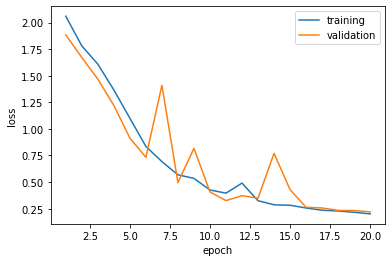

In [11]:
# Plot the loss in the training and validation datasets
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

## Evaluate Model

Generating predictions from validation data...


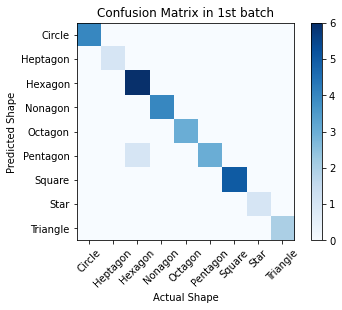

In [15]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded 
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Actual Shape")
plt.ylabel("Predicted Shape")
plt.title('Confusion Matrix in 1st batch')
plt.show()